In [1]:
import numpy as np
import pandas as pd

In [2]:
# Wir gehen ins richtige Arbeitsverzeichnis, dorthin, wo unsere Covid Datenbank liegt.

%cd ~/Documents/Work/Tutorials/RKI_Covid

covid_path = "211203_RKI_COVID19.csv"

#Achtung: Im Github ist nur ein kleiner Auszug der Original RKI Covid_Datei vom 03.12.21 abgelegt.
# Hinweis zu den Daten (Stand 03.12.2021):
# Die Daten sind die „Fallzahlen in Deutschland“ des Robert Koch-Institut (RKI) und stehen unter der Open Data Datenlizenz Deutschland – Namensnennung – Version 2.0 zur Verfügung. 
# Quellenvermerk: Robert Koch-Institut (RKI), dl-de/by-2-0

/Users/uli/Documents/Work/Tutorials/RKI_Covid


In [3]:
# Covid19 Datenbank einlesen und dem Datafram covid zuweisen. covid enthält nun die Daten
covid = pd.read_csv(covid_path)

In [4]:
# Schauen wir uns nur die drei Zeilen des dataframes covid an. 
# Dazu verwenden wir die Funktion head(3) und wenden diese auf covid an.
# Eine Spalte enthält das jeweilige Meldedatum

covid.head(3)

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,1,Schleswig-Holstein,SK Flensburg,A35-A59,M,2,0,2021/11/17 00:00:00+00,1001,"02.12.2021, 00:00 Uhr",0,-9,2021/11/12 00:00:00+00,0,2,1,Nicht übermittelt
1,2,1,Schleswig-Holstein,SK Flensburg,A15-A34,W,1,0,2021/09/27 00:00:00+00,1001,"02.12.2021, 00:00 Uhr",0,-9,2021/09/19 00:00:00+00,0,1,1,Nicht übermittelt
2,3,1,Schleswig-Holstein,SK Flensburg,A35-A59,M,3,0,2021/11/17 00:00:00+00,1001,"02.12.2021, 00:00 Uhr",0,-9,2021/11/14 00:00:00+00,0,3,1,Nicht übermittelt


In [5]:
# Pandas kann mit Datumswerten umgehen, hat Pandas diesen Datenwert richtig erkannt?
# Wir überprüfen das mit
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034186 entries, 0 to 3034185
Data columns (total 18 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ObjectId              int64 
 1   IdBundesland          int64 
 2   Bundesland            object
 3   Landkreis             object
 4   Altersgruppe          object
 5   Geschlecht            object
 6   AnzahlFall            int64 
 7   AnzahlTodesfall       int64 
 8   Meldedatum            object
 9   IdLandkreis           int64 
 10  Datenstand            object
 11  NeuerFall             int64 
 12  NeuerTodesfall        int64 
 13  Refdatum              object
 14  NeuGenesen            int64 
 15  AnzahlGenesen         int64 
 16  IstErkrankungsbeginn  int64 
 17  Altersgruppe2         object
dtypes: int64(10), object(8)
memory usage: 416.7+ MB


In [6]:
# Nein, leider wurde beim einlesen nicht erkannt, dass der Datentyp
# des Meldedatums ein Datum ist.
# Zum Glück bietet Pandas uns hier ein Werkzeug an: Wir lesen die Datenbank
# jetzt einfach noch einmal neu und wir sagen Pandas beim Einlesen
# der Daten, dass Die Spalte Meldedatum ein Datumsformat enthält. Dies machen
# wir mit der Option parse_dates, was soviel heisst wie 
# Interpretiere die Werte von Meldedatum als Datumswerte

covid = pd.read_csv(covid_path, parse_dates=['Meldedatum'])

In [7]:
# Jetzt machen wir uns an die erste Aufgabe. Wir wollen eine Tabelle erstellen, die
# die für jeden Tag für jeden Landkreis alle gemeldeten Fälle enthält.
# Dabei kennzeichnet das datum die Zeile und die Landkreise sind die einzelnen Spalten

In [8]:
# wir brauchen also erst einmal ein paar Eckdaten:
# An welchem Tag beginnt unsere Datenbank und was ist das letzte Datum?
# Und welche Landkreise haben wir eigentlich?

#Für Frage 1 schauen wir uns die Spalte Meldedatum an:

start=covid['Meldedatum'].min()
ende=covid['Meldedatum'].max()

# Die Landkreise erhalten wir aus der Spalte 'Landkreis' und 
# wenden darauf die Funktion unique an. Unique listet als Ergebnis nur 
# die Werte werte auf die unterschiedlich sind, also doppelte Werte werden
# nur einmal aufgelistet. Das Ergebnis kommt in die Variable landkreise
# Die Budesländer nehmen wir anlaog auch gleich mit und speichern das Ergebnis in
# der Variablen bundesländer

landkreise=covid['Landkreis'].unique()
bundeslaender=covid['Bundesland'].unique()

In [9]:
# So, was enthalten denn nun unsere Variablen start, ende, landkreise und bundesländer?
start

Timestamp('2020-01-02 00:00:00+0000', tz='UTC')

In [10]:
ende

Timestamp('2021-12-01 00:00:00+0000', tz='UTC')

In [11]:
# Das sieht fast ein wenig kryptisch aus, ist aber noch lesbar.
# Gespeichert sind hier die Daten im pandas internen datumsformat.
# Man erkennt sehr schön das Datum und die Zeit, eine Zeitzone ist ebenfalls mit angegeben.

In [12]:
# landkreise enthält als eindimensionales array ale Landkreisnamen
landkreise

array(['SK Flensburg', 'SK Kiel', 'SK Lübeck', 'SK Neumünster',
       'LK Dithmarschen', 'LK Herzogtum Lauenburg', 'LK Nordfriesland',
       'LK Ostholstein', 'LK Pinneberg', 'LK Plön',
       'LK Rendsburg-Eckernförde', 'LK Schleswig-Flensburg',
       'LK Segeberg', 'LK Steinburg', 'LK Stormarn', 'SK Hamburg',
       'SK Braunschweig', 'SK Salzgitter', 'SK Wolfsburg', 'LK Gifhorn',
       'LK Goslar', 'LK Helmstedt', 'LK Northeim', 'LK Peine',
       'LK Wolfenbüttel', 'LK Göttingen', 'Region Hannover',
       'LK Diepholz', 'LK Hameln-Pyrmont', 'LK Hildesheim',
       'LK Holzminden', 'LK Nienburg (Weser)', 'LK Schaumburg',
       'LK Celle', 'LK Cuxhaven', 'LK Harburg', 'LK Lüneburg',
       'LK Lüchow-Dannenberg', 'LK Osterholz', 'LK Rotenburg (Wümme)',
       'LK Heidekreis', 'LK Stade', 'LK Uelzen', 'LK Verden',
       'SK Delmenhorst', 'SK Emden', 'SK Oldenburg', 'SK Osnabrück',
       'SK Wilhelmshaven', 'LK Ammerland', 'LK Aurich', 'LK Cloppenburg',
       'LK Emsland', 'LK

In [13]:
# bundeslaender ist ebenfalls ein eindimensionales Array
bundeslaender

array(['Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 'Bremen',
       'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz',
       'Baden-Württemberg', 'Bayern', 'Saarland', 'Berlin', 'Brandenburg',
       'Mecklenburg-Vorpommern', 'Sachsen', 'Sachsen-Anhalt', 'Thüringen'],
      dtype=object)

In [14]:
# Bevor wir nun zum Gruppieren der daten kommen lehnen wir uns erstmal zurück und
# drucken uns etwas Info aus. Das machen wir mit dem Befehl print und wir nutzen
# die Funktion strftime('%d.%m.%Y') der wir mitgeben, wie unser Start- und Enddatum ausgedruckt werden solll.

# print()
# strftime('%d.%m.%Y')

print('Start Erfassung:', start.strftime('%d.%m.%Y')) 
print('Ende  Erfassung:', ende.strftime('%d.%m.%Y'))

# Wir wollen auch wissen, wieviele bundesländer und landkreise wir haben und dazu bestimmen wir die Anzahl der
# Elemenete in den Variablen landkreise und bundeslaender mit der Pytho Funktion len()

# len()

print('Anzahl Bundesländer:', len(bundeslaender))
print('Anzahl Landkreise:', len(landkreise))

Start Erfassung: 02.01.2020
Ende  Erfassung: 01.12.2021
Anzahl Bundesländer: 16
Anzahl Landkreise: 411


In [15]:
# Und jetzt kommen wir zum kleinen Höhepunkt unseres Tutorials.
# Wir stellen jetzt unseren Datafram um, indem wir nach Landkreis und Datum
# gruppieren. Das geht einfach mit dem Befehl groupby. Gleichzeitig sollen die Spalten
# alle Zeilen, die gleiche Landkreise enthalten addiert werden. Dazu stellen 
# wir die Funktion sum() ans Ende.

cov_gruppiert = covid.groupby(['Landkreis', 'Meldedatum']).sum()

cov_gruppiert

ObjectId  IdBundesland  \
Landkreis           Meldedatum                                          
LK Ahrweiler        2020-03-12 00:00:00+00:00   5922237            35   
                    2020-03-13 00:00:00+00:00   2367136            14   
                    2020-03-14 00:00:00+00:00   1186555             7   
                    2020-03-16 00:00:00+00:00   3555088            21   
                    2020-03-17 00:00:00+00:00   5925148            35   
...                                                 ...           ...   
StädteRegion Aachen 2021-11-27 00:00:00+00:00  37470566           320   
                    2021-11-28 00:00:00+00:00  12248676           105   
                    2021-11-29 00:00:00+00:00  23337852           200   
                    2021-11-30 00:00:00+00:00  23912086           205   
                    2021-12-01 00:00:00+00:00  13421400           115   

                                               AnzahlFall  AnzahlTodesfall  \
Landkreis           Meldedatum                                               
LK Ahrweiler        2020-03-12 00:00:00+00:00           6                0   
                    2020-03-13 00:00:00+00:00           3                0   
                    2020-03-14 00:00:00+00:00           1                0   
                    2020-03-16 00:00:00+00:00           4                0   
                    2020-03-17 00:00:00+00:00           6                0   
...                                                   ...              ...   
StädteRegion Aachen 2021-11-27 00:00:00+00:00         205                0   
                    2021-11-28 00:00:00+00:00          51                0   
                    2021-11-29 00:00:00+00:00         206                0   
                    2021-11-30 00:00:00+00:00         355                0   
                    2021-12-01 00:00:00+00:00          45                0   

                                               IdLandkreis  NeuerFall  \
Landkreis           Meldedatum                                          
LK Ahrweiler        2020-03-12 00:00:00+00:00        35655          0   
                    2020-03-13 00:00:00+00:00        14262          0   
                    2020-03-14 00:00:00+00:00         7131          0   
                    2020-03-16 00:00:00+00:00        21393          0   
                    2020-03-17 00:00:00+00:00        35655          0   
...                                                    ...        ...   
StädteRegion Aachen 2021-11-27 00:00:00+00:00       341376          0   
                    2021-11-28 00:00:00+00:00       112014          0   
                    2021-11-29 00:00:00+00:00       213360          2   
                    2021-11-30 00:00:00+00:00       218694         24   
                    2021-12-01 00:00:00+00:00       122682         23   

                                               NeuerTodesfall  NeuGenesen  \
Landkreis           Meldedatum                                              
LK Ahrweiler        2020-03-12 00:00:00+00:00             -45           0   
                    2020-03-13 00:00:00+00:00             -18           0   
                    2020-03-14 00:00:00+00:00              -9           0   
                    2020-03-16 00:00:00+00:00             -27           0   
                    2020-03-17 00:00:00+00:00             -45           0   
...                                                       ...         ...   
StädteRegion Aachen 2021-11-27 00:00:00+00:00            -576        -539   
                    2021-11-28 00:00:00+00:00            -189        -179   
                    2021-11-29 00:00:00+00:00            -360        -342   
                    2021-11-30 00:00:00+00:00            -369        -332   
                    2021-12-01 00:00:00+00:00            -207        -177   

                                               AnzahlGenesen  \
Landkreis           Meldedatum                                 
LK

In [16]:
# das ist noch zuviel an Saplten, wir reduzieren uns auf die Anzahl Fälle und erzeugen 
# uns eine kleinere Series, die nur die Fälle enthält

Faelle=cov_gruppiert['AnzahlFall']
Faelle

Landkreis            Meldedatum               
LK Ahrweiler         2020-03-12 00:00:00+00:00      6
                     2020-03-13 00:00:00+00:00      3
                     2020-03-14 00:00:00+00:00      1
                     2020-03-16 00:00:00+00:00      4
                     2020-03-17 00:00:00+00:00      6
                                                 ... 
StädteRegion Aachen  2021-11-27 00:00:00+00:00    205
                     2021-11-28 00:00:00+00:00     51
                     2021-11-29 00:00:00+00:00    206
                     2021-11-30 00:00:00+00:00    355
                     2021-12-01 00:00:00+00:00     45
Name: AnzahlFall, Length: 203889, dtype: int64

In [17]:
# Diese Seeries sieht sehr interessant aus, und sie sieht anders aus, als die Series 
# die wir bisher kennengelernt haben. Sie hat zwar ganz rechts den Vektor der summierten Fallzahlen aber 
# links sieht man jetzt zwei indizes, einmal die Region, dann das Datum
# So etwas nennt man Multiindex in Pandas

In [18]:
# Das sieht doch schon fast aus wie das, was wir wollen.
# Aber stopp: Nicht jeder Stadt- oder Landkreis hat jeden tag gemeldet. 
# Wir wollen aber eine Tabelle für alle Tage der Pandemie.
# Deshalb genereiren wir uns nun eine Series, die jeden Tag der Pandemie enthält, von 
# unserem Start bis zum Enddatum



tagesliste = pd.date_range(start,ende)

#schauen wir uns den Inhalt dieser Series an, tatsächlich alle daten von Start bis Ende im Tagesrythmus

tagesliste

DatetimeIndex(['2020-01-02 00:00:00+00:00', '2020-01-03 00:00:00+00:00',
               '2020-01-04 00:00:00+00:00', '2020-01-05 00:00:00+00:00',
               '2020-01-06 00:00:00+00:00', '2020-01-07 00:00:00+00:00',
               '2020-01-08 00:00:00+00:00', '2020-01-09 00:00:00+00:00',
               '2020-01-10 00:00:00+00:00', '2020-01-11 00:00:00+00:00',
               ...
               '2021-11-22 00:00:00+00:00', '2021-11-23 00:00:00+00:00',
               '2021-11-24 00:00:00+00:00', '2021-11-25 00:00:00+00:00',
               '2021-11-26 00:00:00+00:00', '2021-11-27 00:00:00+00:00',
               '2021-11-28 00:00:00+00:00', '2021-11-29 00:00:00+00:00',
               '2021-11-30 00:00:00+00:00', '2021-12-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=700, freq='D')

In [19]:
# Schauen wir uns nun einmal an, wie wir hier einzelne Landkreise herausgreifen können
# Wir extrahieren den Stadkreis Duisbirg und wollen nur die Spalte AnzahlFall sehen
# Das Ergebnis ist eine Series, die alle Daten und Fallmedungen von Duisburg enthält!

cov_gruppiert.loc['SK Duisburg','AnzahlFall']

Meldedatum
2020-03-01 00:00:00+00:00      1
2020-03-04 00:00:00+00:00      1
2020-03-06 00:00:00+00:00      1
2020-03-10 00:00:00+00:00      5
2020-03-11 00:00:00+00:00      1
                            ... 
2021-11-27 00:00:00+00:00    150
2021-11-28 00:00:00+00:00    121
2021-11-29 00:00:00+00:00    146
2021-11-30 00:00:00+00:00    207
2021-12-01 00:00:00+00:00    270
Name: AnzahlFall, Length: 632, dtype: int64

In [20]:
# Jetzt bauen wir uns unsere Ergebnistabelle zusammen:
# Wir erzeugen einen leeren Datenframe mit dem Namen result, der als Index unsere Pandemie-Tagesliste enthält:

result=pd.DataFrame(index=tagesliste)

In [21]:
# Und nun rufen wir automatisiert alle unsere Stad- und Landkriese ab und hängen sie in unseren result datenframe.
# Das machen wir mit dem Befehl concat, also "zusammenfügen"
# wichtig ist noch die info, dass jedeer sTadt- und Landkreis als neue Spalte angefügt wird und nicht als Zeile. Das steuern wir mit dem 
# Parameter axis=1. in pandas bedeutet axis=0 den Bezug auf die zeile und axis=1 den Bezug auf die Spalte.

for lk in landkreise:
    tmp=Faelle.xs(lk)
    tmp.rename(lk, inplace=True)
    result = pd.concat([result, tmp], axis=1)

In [22]:
result

,SK Flensburg,SK Kiel,SK Lübeck,SK Neumünster,LK Dithmarschen,LK Herzogtum Lauenburg,LK Nordfriesland,LK Ostholstein,LK Pinneberg,LK Plön,...,LK Sömmerda,LK Hildburghausen,LK Ilm-Kreis,LK Weimarer Land,LK Sonneberg,LK Saalfeld-Rudolstadt,LK Saale-Holzland-Kreis,LK Saale-Orla-Kreis,LK Greiz,LK Altenburger Land
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27 00:00:00+00:00,35.0,41.0,29.0,36.0,19.0,79.0,30.0,13.0,83.0,15.0,...,58.0,37.0,99.0,103.0,105.0,19.0,189.0,194.0,107.0,137.0
2021-11-28 00:00:00+00:00,9.0,18.0,NaN,2.0,8.0,40.0,22.0,NaN,36.0,NaN,...,42.0,NaN,128.0,140.0,84.0,157.0,119.0,130.0,192.0,20.0
2021-11-29 00:00:00+00:00,17.0,28.0,74.0,14.0,9.0,17.0,32.0,46.0,88.0,44.0,...,7.0,180.0,214.0,88.0,123.0,591.0,36.0,83.0,177.0,108.0
2021-11-30 00:00:00+00:00,20.0,99.0,79.0,10.0,30.0,110.0,29.0,63.0,98.0,51.0,...,12.0,150.0,197.0,110.0,123.0,269.0,171.0,216.0,93.0,217.0


In [23]:
# das ist fast ok, doch noch nicht ganz, was wir wollen: Was fällt uns auf?
# Hier tauchen NaN Werte auf, sog. Not a Number Werte, nämlich genau da wo keine 
# Fallmeldung des Stat- oder Landkreises vorhanden war.
# Pandas fügt hier keine Null ein, sondern warnt uns quai: Hier ist kein Wert vorhanden.

# Für unsere tabelle wollen wir diese NaNs aber trotzdem durch Nullen ersetzen, das machen
# wir mit dem befehl flillna und wir setzen den Ersatwert mit dem Parameter Value auf 0

result.fillna(value=0)

,SK Flensburg,SK Kiel,SK Lübeck,SK Neumünster,LK Dithmarschen,LK Herzogtum Lauenburg,LK Nordfriesland,LK Ostholstein,LK Pinneberg,LK Plön,...,LK Sömmerda,LK Hildburghausen,LK Ilm-Kreis,LK Weimarer Land,LK Sonneberg,LK Saalfeld-Rudolstadt,LK Saale-Holzland-Kreis,LK Saale-Orla-Kreis,LK Greiz,LK Altenburger Land
2020-01-02 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-06 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27 00:00:00+00:00,35.0,41.0,29.0,36.0,19.0,79.0,30.0,13.0,83.0,15.0,...,58.0,37.0,99.0,103.0,105.0,19.0,189.0,194.0,107.0,137.0
2021-11-28 00:00:00+00:00,9.0,18.0,0.0,2.0,8.0,40.0,22.0,0.0,36.0,0.0,...,42.0,0.0,128.0,140.0,84.0,157.0,119.0,130.0,192.0,20.0
2021-11-29 00:00:00+00:00,17.0,28.0,74.0,14.0,9.0,17.0,32.0,46.0,88.0,44.0,...,7.0,180.0,214.0,88.0,123.0,591.0,36.0,83.0,177.0,108.0
2021-11-30 00:00:00+00:00,20.0,99.0,79.0,10.0,30.0,110.0,29.0,63.0,98.0,51.0,...,12.0,150.0,197.0,110.0,123.0,269.0,171.0,216.0,93.0,217.0


In [24]:
# Das sieht gut aus, aber Achtung! Das Ergebnis der Operation fillna wurde nur auf unseren 
# Ergebnisdataframe angewendet, es wurde nichts im Datenframe geändert:
# Das können wir nachprüfen, wenn wir result noch einmal aufrufen:

result

,SK Flensburg,SK Kiel,SK Lübeck,SK Neumünster,LK Dithmarschen,LK Herzogtum Lauenburg,LK Nordfriesland,LK Ostholstein,LK Pinneberg,LK Plön,...,LK Sömmerda,LK Hildburghausen,LK Ilm-Kreis,LK Weimarer Land,LK Sonneberg,LK Saalfeld-Rudolstadt,LK Saale-Holzland-Kreis,LK Saale-Orla-Kreis,LK Greiz,LK Altenburger Land
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27 00:00:00+00:00,35.0,41.0,29.0,36.0,19.0,79.0,30.0,13.0,83.0,15.0,...,58.0,37.0,99.0,103.0,105.0,19.0,189.0,194.0,107.0,137.0
2021-11-28 00:00:00+00:00,9.0,18.0,NaN,2.0,8.0,40.0,22.0,NaN,36.0,NaN,...,42.0,NaN,128.0,140.0,84.0,157.0,119.0,130.0,192.0,20.0
2021-11-29 00:00:00+00:00,17.0,28.0,74.0,14.0,9.0,17.0,32.0,46.0,88.0,44.0,...,7.0,180.0,214.0,88.0,123.0,591.0,36.0,83.0,177.0,108.0
2021-11-30 00:00:00+00:00,20.0,99.0,79.0,10.0,30.0,110.0,29.0,63.0,98.0,51.0,...,12.0,150.0,197.0,110.0,123.0,269.0,171.0,216.0,93.0,217.0


In [25]:
# Richtig, die NaNs sind immer noch da.
# Wer schon mal programmiert hat würde jetzt das Ergebnis der fillna Operation der variablen Result zuweisen

# result = result.fillna(value=0)

# Das kann man machen, es gibt aber auch einen Trick in Pandas, der das Ergebnis der Operation gleich auf die 
# Originaldatei anwendet. Das passiert, wenn man den Parameter inplace=True verwendet

result.fillna(value=0, inplace=True)

In [26]:
# Als letzte kosmetische Operation wollen wir die Dezimalzahlen durch Integer ersetzen, dazu setzen wir einfach den Typ des Ergebnisses auf
# int mit der funktion astype(). inplace funktioniert hier nicht, deswqegen müssen wir das Ergebnis
# unserem resiltdataframe zuweisen.

result = result.astype(int)

In [27]:
# Und das wäre es jezt, resulthat nun integer werte und keine NaNs mehr.

result

,SK Flensburg,SK Kiel,SK Lübeck,SK Neumünster,LK Dithmarschen,LK Herzogtum Lauenburg,LK Nordfriesland,LK Ostholstein,LK Pinneberg,LK Plön,...,LK Sömmerda,LK Hildburghausen,LK Ilm-Kreis,LK Weimarer Land,LK Sonneberg,LK Saalfeld-Rudolstadt,LK Saale-Holzland-Kreis,LK Saale-Orla-Kreis,LK Greiz,LK Altenburger Land
2020-01-02 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-03 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-04 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-05 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-06 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27 00:00:00+00:00,35,41,29,36,19,79,30,13,83,15,...,58,37,99,103,105,19,189,194,107,137
2021-11-28 00:00:00+00:00,9,18,0,2,8,40,22,0,36,0,...,42,0,128,140,84,157,119,130,192,20
2021-11-29 00:00:00+00:00,17,28,74,14,9,17,32,46,88,44,...,7,180,214,88,123,591,36,83,177,108
2021-11-30 00:00:00+00:00,20,99,79,10,30,110,29,63,98,51,...,12,150,197,110,123,269,171,216,93,217


In [28]:
# Das wärs für heute, aber damit es nicht so trocken und theoretisch bleibt, gibt es hier noch one more thing.
# Pandas kann auch plotten, was man durchaus in einem eigenen Tutorial erläutern kann oder muss, hier nur ein 
# kleiner Vorgeschmack

# Wir müssen dem Jupiter Notebook vorab sagen, dass wir die Plots hier im Notebook sehen wollen: 
# Das geht mit dem Metakommando matplotlib inline 

%matplotlib inline

<AxesSubplot:>

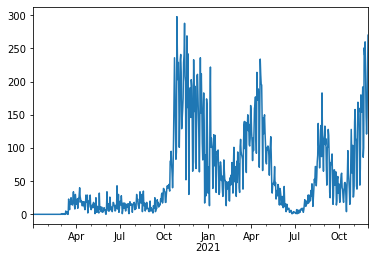

In [29]:
# Und das plotten geht nun ganz einfach und hier sieht man schön die Eleganz von Python und Pandas:
# Wir greifen die Spalte vom Stadkreis Dusiburg heraus und plotten sie mit der Funktion plot()


result['SK Duisburg'].plot()

In [30]:
# Das Ergebnis sind die Fallzahlen von Duisburg von Beginn der Pandemie bis Anfang Dezember 2021.
# Der Graph ist zackelig, da hier nicht gemittelt wurde und man die tagesaktuellen Schwankungen sieht.

# So, das wärs für heute. Wieder die hoffnung, dass es nicht zu trocken war und ass meine Begeisterung für
# pandas wenigstens ein bisschen rübergekommen ist.
